# Graph Isomorphism Problem

**Graph Isomorphism Problem** (or GI, for short) concerns two finite graphs, whether they are isomorphic or not. A graph is **isomorphic** when the graph can have more than one form, with:

* the same number of edges,
* the same number of nodes, 
* each node has the same number of degree as its exact same node in another graph
* a bijection that when one node is linked to another node in another graph, that link equates to one exists in the edges of both graphs

In this case, **Graph Isomorphism Problem** involves how to determine if the graphs are isomorphic or not, fulfilling conditions above. This would involve making combinations of bijections to determine the isomorphic nature of the graphs. The combinations make would increase in a factorial number, depending on the amount of nodes, (e.g. 5 nodes will have 5! possible combinations) if done in a brute force method.

## Determining the Isomorphic Nature
To determine the isomorphic nature, let's set an example of a simple 3 node grpah, and its isomorphic graph.

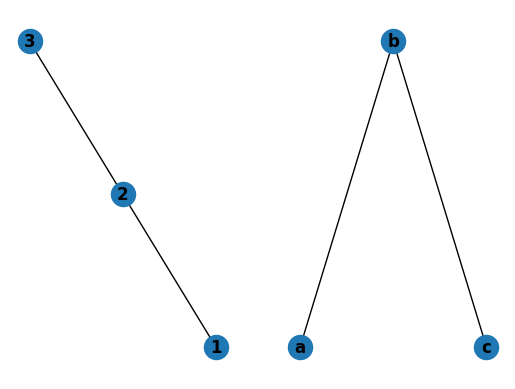

In [23]:
# Do "pip install networkx" and "pip install matplotlib" first to get the full functionalities 
import networkx as nx
import matplotlib.pyplot as plt

# First Graph
G = nx.Graph()
GE = [(1, 2), (2, 3)] # Add edges

G.add_nodes_from([
    (1, {"color": "red"}),
    (2, {"color": "green"}),
    (3, {"color": "blue"})
])
G.add_edges_from(GE)

# Second Graph
H = nx.Graph()
HE = [("a", "b"), ("b", "c")]

H.add_nodes_from([
    ("a", {"color": "red"}),
    ("b", {"color": "green"}),
    ("c", {"color": "blue"})
])

H.add_edges_from(HE)

subax1 = plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
subax2 = plt.subplot(122)
nx.draw_spectral(H, with_labels=True, font_weight='bold')

The graphs are examined first with the two conditions: the same number of edges, and the same number of nodes

In [2]:
# Same number of nodes
len(list(G.nodes)) == len(list(H.nodes))

True

In [3]:
# Same number of edges
len(list(G.edges)) == len(list(H.edges))

True

As seen in those code above, the nodes and edges have the same numbers of nodes and edges. With this, we can move on to determining the isomorphic nature via analysing each combination of the graphs relationship.

In [35]:
import itertools as it

# Firstly, we will need to get all the permutations of another graph, in this case, H.
HP = list(it.permutations(list(H.nodes),len(H.nodes)))

HP

[('a', 'b', 'c', 'd', 'e'),
 ('a', 'b', 'c', 'e', 'd'),
 ('a', 'b', 'd', 'c', 'e'),
 ('a', 'b', 'd', 'e', 'c'),
 ('a', 'b', 'e', 'c', 'd'),
 ('a', 'b', 'e', 'd', 'c'),
 ('a', 'c', 'b', 'd', 'e'),
 ('a', 'c', 'b', 'e', 'd'),
 ('a', 'c', 'd', 'b', 'e'),
 ('a', 'c', 'd', 'e', 'b'),
 ('a', 'c', 'e', 'b', 'd'),
 ('a', 'c', 'e', 'd', 'b'),
 ('a', 'd', 'b', 'c', 'e'),
 ('a', 'd', 'b', 'e', 'c'),
 ('a', 'd', 'c', 'b', 'e'),
 ('a', 'd', 'c', 'e', 'b'),
 ('a', 'd', 'e', 'b', 'c'),
 ('a', 'd', 'e', 'c', 'b'),
 ('a', 'e', 'b', 'c', 'd'),
 ('a', 'e', 'b', 'd', 'c'),
 ('a', 'e', 'c', 'b', 'd'),
 ('a', 'e', 'c', 'd', 'b'),
 ('a', 'e', 'd', 'b', 'c'),
 ('a', 'e', 'd', 'c', 'b'),
 ('b', 'a', 'c', 'd', 'e'),
 ('b', 'a', 'c', 'e', 'd'),
 ('b', 'a', 'd', 'c', 'e'),
 ('b', 'a', 'd', 'e', 'c'),
 ('b', 'a', 'e', 'c', 'd'),
 ('b', 'a', 'e', 'd', 'c'),
 ('b', 'c', 'a', 'd', 'e'),
 ('b', 'c', 'a', 'e', 'd'),
 ('b', 'c', 'd', 'a', 'e'),
 ('b', 'c', 'd', 'e', 'a'),
 ('b', 'c', 'e', 'a', 'd'),
 ('b', 'c', 'e', 'd'

In [36]:
# Then, map each permutation with the nodes from the previous graph, G
def get_dictionary_permutation(permutation):
    for i in range(len(permutation)):
        permutation[i] = dict(zip(permutation[i],G.nodes))
    return permutation

HP = get_dictionary_permutation(HP)
HP

[{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5},
 {'a': 1, 'b': 2, 'c': 3, 'e': 4, 'd': 5},
 {'a': 1, 'b': 2, 'd': 3, 'c': 4, 'e': 5},
 {'a': 1, 'b': 2, 'd': 3, 'e': 4, 'c': 5},
 {'a': 1, 'b': 2, 'e': 3, 'c': 4, 'd': 5},
 {'a': 1, 'b': 2, 'e': 3, 'd': 4, 'c': 5},
 {'a': 1, 'c': 2, 'b': 3, 'd': 4, 'e': 5},
 {'a': 1, 'c': 2, 'b': 3, 'e': 4, 'd': 5},
 {'a': 1, 'c': 2, 'd': 3, 'b': 4, 'e': 5},
 {'a': 1, 'c': 2, 'd': 3, 'e': 4, 'b': 5},
 {'a': 1, 'c': 2, 'e': 3, 'b': 4, 'd': 5},
 {'a': 1, 'c': 2, 'e': 3, 'd': 4, 'b': 5},
 {'a': 1, 'd': 2, 'b': 3, 'c': 4, 'e': 5},
 {'a': 1, 'd': 2, 'b': 3, 'e': 4, 'c': 5},
 {'a': 1, 'd': 2, 'c': 3, 'b': 4, 'e': 5},
 {'a': 1, 'd': 2, 'c': 3, 'e': 4, 'b': 5},
 {'a': 1, 'd': 2, 'e': 3, 'b': 4, 'c': 5},
 {'a': 1, 'd': 2, 'e': 3, 'c': 4, 'b': 5},
 {'a': 1, 'e': 2, 'b': 3, 'c': 4, 'd': 5},
 {'a': 1, 'e': 2, 'b': 3, 'd': 4, 'c': 5},
 {'a': 1, 'e': 2, 'c': 3, 'b': 4, 'd': 5},
 {'a': 1, 'e': 2, 'c': 3, 'd': 4, 'b': 5},
 {'a': 1, 'e': 2, 'd': 3, 'b': 4, 'c': 5},
 {'a': 1, '

In [37]:
# After which, subsitute the edges for each possible permutations with the ones from dictionary above
def get_final_permutations(permutation, edge):
    final_list = list()
    for i in range(len(permutation)): # Run through each permutation
        permutation_tuple = list()
        for j in range(len(edge)): # Run through each edge
            permutation_each = list()
            for k in range(len(edge[j])): # For each node in an edge
                permutation_each.append(permutation[i][edge[j][k]]) # Subsitute graph H with Graph G
            permutation_tuple.append(tuple(permutation_each))
        final_list.append(permutation_tuple)
    return final_list

HR = get_final_permutations(HP, HE)
HR

[[(1, 2), (2, 5), (2, 4), (1, 3), (3, 4), (1, 5), (4, 5)],
 [(1, 2), (2, 4), (2, 5), (1, 3), (3, 5), (1, 4), (5, 4)],
 [(1, 2), (2, 5), (2, 3), (1, 4), (4, 3), (1, 5), (3, 5)],
 [(1, 2), (2, 4), (2, 3), (1, 5), (5, 3), (1, 4), (3, 4)],
 [(1, 2), (2, 3), (2, 5), (1, 4), (4, 5), (1, 3), (5, 3)],
 [(1, 2), (2, 3), (2, 4), (1, 5), (5, 4), (1, 3), (4, 3)],
 [(1, 3), (3, 5), (3, 4), (1, 2), (2, 4), (1, 5), (4, 5)],
 [(1, 3), (3, 4), (3, 5), (1, 2), (2, 5), (1, 4), (5, 4)],
 [(1, 4), (4, 5), (4, 3), (1, 2), (2, 3), (1, 5), (3, 5)],
 [(1, 5), (5, 4), (5, 3), (1, 2), (2, 3), (1, 4), (3, 4)],
 [(1, 4), (4, 3), (4, 5), (1, 2), (2, 5), (1, 3), (5, 3)],
 [(1, 5), (5, 3), (5, 4), (1, 2), (2, 4), (1, 3), (4, 3)],
 [(1, 3), (3, 5), (3, 2), (1, 4), (4, 2), (1, 5), (2, 5)],
 [(1, 3), (3, 4), (3, 2), (1, 5), (5, 2), (1, 4), (2, 4)],
 [(1, 4), (4, 5), (4, 2), (1, 3), (3, 2), (1, 5), (2, 5)],
 [(1, 5), (5, 4), (5, 2), (1, 3), (3, 2), (1, 4), (2, 4)],
 [(1, 4), (4, 3), (4, 2), (1, 5), (5, 2), (1, 3), (2, 3)

In [38]:
# Compare each edges for each permutation to the one in the previous graph (G)
def check_bijections_isomorphism(final_permutation, other_edge):
    for i in range(len(final_permutation)):
        if (final_permutation[i] == other_edge): # If a permutation of edges is the same as with the previous graph's edges, print out the message
            print("Isomorphism found.")
            break
        elif (i == len(final_permutation)-1):
            print("Isomorphism not found.")

check_bijections_isomorphism(HR, GE)

Isomorphism found.


As seen above, graph isomorphism is found in a relatively simple graph. Here's a more complicated example, with more edges, and more nodes:

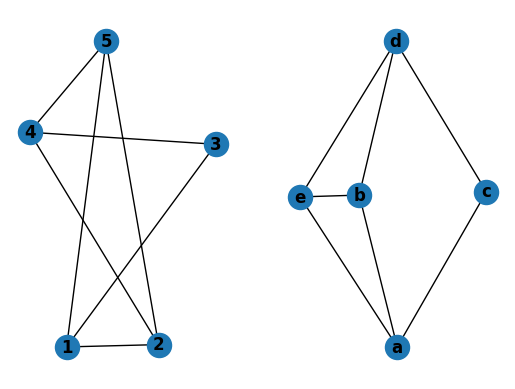

In [28]:
# First Graph
G = nx.Graph()
GE = [(1, 2), (2, 5), (2, 4), (1, 3), (3, 4), (1, 5), (4, 5)] # Add edges

G.add_nodes_from([
    (1, {"color": "red"}),
    (2, {"color": "green"}),
    (3, {"color": "blue"}),
    (4, {"color": "yellow"}),
    (5, {"color": "purple"})
])
G.add_edges_from(GE)

# Second Graph
H = nx.Graph()
HE = [("a", "b"), ("b", "e"), ("b", "d"), ("a", "c"), ("c", "d"), ("a", "e"), ("d", "e")]

H.add_nodes_from([
    ("a", {"color": "red"}),
    ("b", {"color": "green"}),
    ("c", {"color": "blue"}),
    ("d", {"color": "yellow"}),
    ("e", {"color": "purple"})
])

H.add_edges_from(HE)

subax1 = plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
subax2 = plt.subplot(122)
nx.draw(H, with_labels=True, font_weight='bold')

In [40]:
# First determine the amount of edges and nodes if they are the same with each other or not
# Same number of nodes
print(len(list(G.nodes)) == len(list(H.nodes)))

# Same number of edges
print(len(list(G.edges)) == len(list(H.edges)))

# Then, create permutations for the H graph to compare with the other graph, G, 
# to see if one of the permutation has bijections that are the same as with each other
HP = list(it.permutations(list(H.nodes),len(H.nodes)))
HP = get_dictionary_permutation(HP)
HR = get_final_permutations(HP, HE)
check_bijections_isomorphism(HR, GE)

True
True
Isomorphism found.


Now, these graphs are still isomorphic, but if we take a look at the length of the permutation:

In [41]:
len(HP)

120

The length significantly increased from when there's only 3 nodes. This is because the graphs would have to be permutated for every possible permutations of bijections that can occur for each graph. This is really a problem in runtime, as this is deemed as a brute force method, and that there's no shortcuts to this, even when trying to solve to a polynomial time. (one of the fastest runtime for executing a method)

Therefore, with the code above, the runtime for the code is around `N!` considering the entire code as a whole, which can be significant when it is plotted on a graph below. (comparing factorial and linear graph)

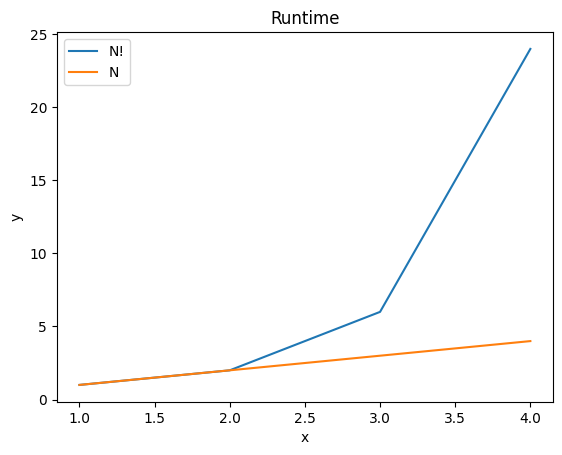

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# generate x values
x = list(range(1, 5))
# generate factorial values
factorial = list()
for num in x:
    factorial.append(np.math.factorial(num))

# Plot the graphs
plt.plot(x, factorial, label='N!')
plt.plot(x, x, label='N')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Runtime')
plt.show()


# An Attempt for Practical Algorithms for Graph Isomorphism
There are attempts to make this algorithm more efficient. Take Stoichev's attempts as an example *insert citation here* where five new algorithms (all known as Vseps) are introduced. One particular algorithm, Vsep-is, is used for graph isomorphism. 

However, their worst case is still exponential time of `2^N`, which is still significant when compared to polynomial time or even linear time, as it compares every nodes of the graphs themselves.


# References
(to do)
* Stoichev, Stoicho D. (2019), "New Exact and Heuristic Algorithms for Graph Automorphism Group and Graph Isomorphism", Journal of Experimental Algorithmics (JEA), 24: 1–27.

---

End of notebook